## Importing all the important libraries

In [38]:
import numpy as np  # linear algebra
from numpy import nan
import pandas as pd  # read dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations
import sklearn 
%matplotlib inline

#importing label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#libraries to handle imbalance data
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

#libraries to spit data into test and train
from sklearn.model_selection import train_test_split

#library to implement KNN
from sklearn.neighbors import KNeighborsClassifier

#Evaluation libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
# importing the dataset
df = pd.read_csv('adult.csv') 

### Data Dictionary
1. Categorical Attributes


    - Individual work category
     
 - workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.


     - Individual's highest education degree
 - education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th,         Masters,1st-4th, 10th, Doctorate, 5th-6th, Preschool.


     - Individual marital status
 - marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-     spouse.


     -  Individual's occupation
 - occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,       Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.


     - Individual's relation in a family
 - relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.


     - Race of Individual
 - race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.


    - sex of individual
 - sex: Female, Male.


     - Individual's native country
 - native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 
 
 
 
 2. Continuous Attributes

    - Age of an individual
 - age: continuous.

    - The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
 - fnlwgt: final weight, continuous.

    - capital-gain: continuous.

    - capital-loss: continuous.

    - Individual's working hour per week
 - hours-per-week: continuous.


 
 

### Exploring the data set

In [3]:
# exploring the dataframe
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# income is our predicor variable hence, mapping the income class  into binary (0 & 1)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


## Data cleaning

In [5]:
# we can observe that there are some missing data as '?'
# we can replace '?' with nan
df=df.replace("?",nan)
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# % missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [7]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [8]:
df["workclass"].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df["native-country"].unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [10]:
# we can use mode to fix the missing values as the missing percentag is very less

df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

In [11]:
# % missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

### Summary

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [13]:
# statistical summary
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


## Exploratory data analysis

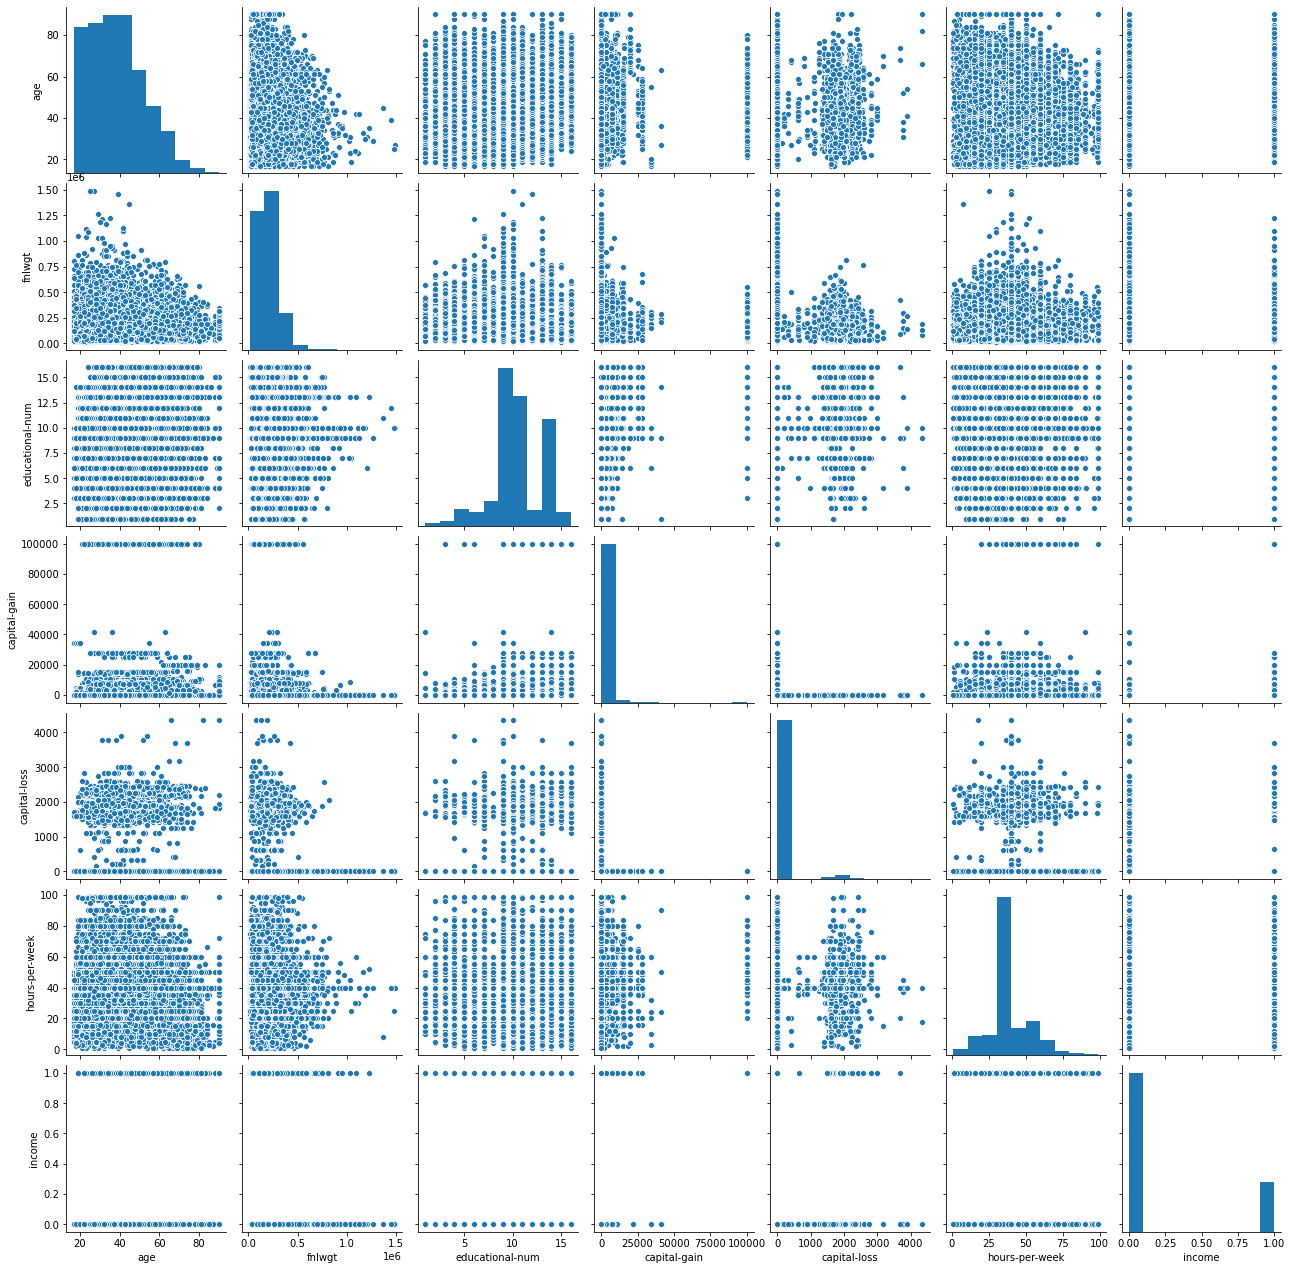

In [15]:
sns.pairplot(df)

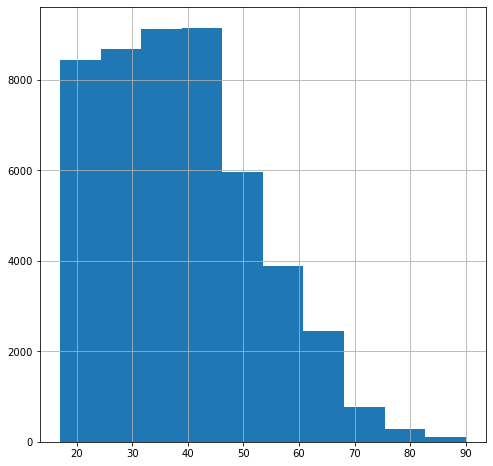

In [16]:
df['age'].hist(figsize=(8,8))
plt.show()

 - age is not evenly distributed there are some outliers in age group more than 70 and less than 20

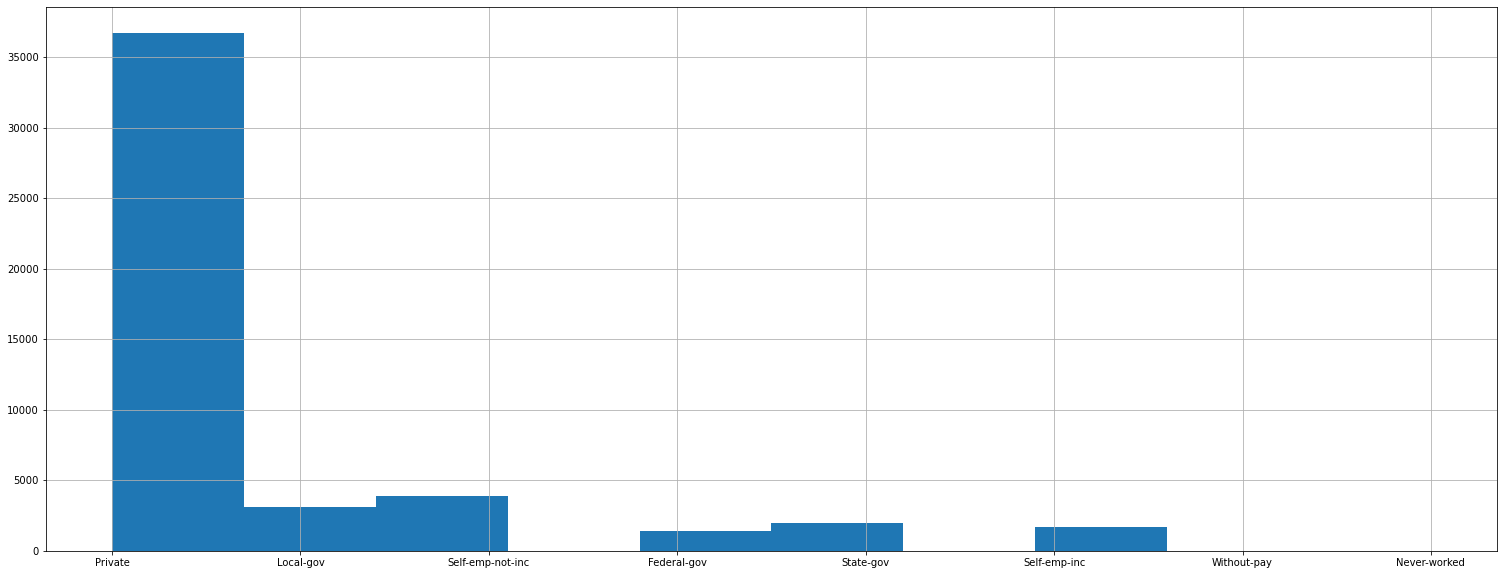

In [17]:
df['workclass'].hist(figsize=(26,10))
plt.show()

 - Most of the people work in private sector

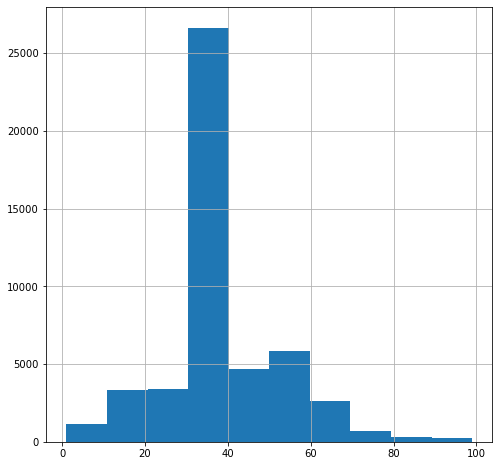

In [18]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

 - Most people work 30-40 hours per week.however there are outliers as some people work 80-100 hours and some work less than 20

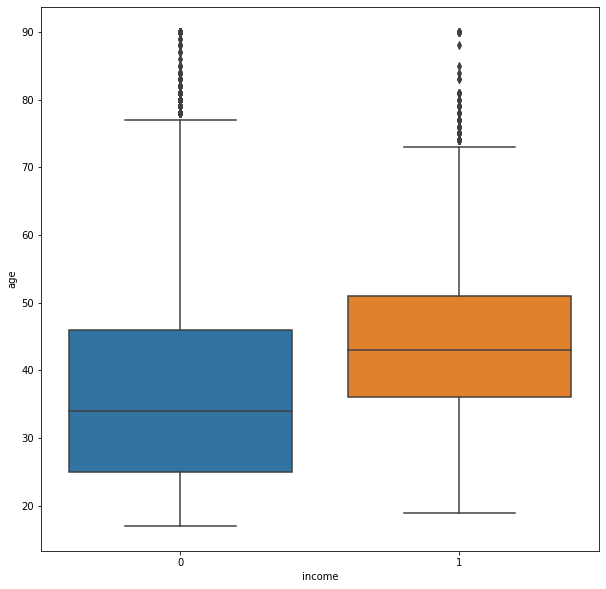

In [19]:

fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

 - for income >50k the age group is 35-52 years.

 - for income <=50k the age group is 25-45 years

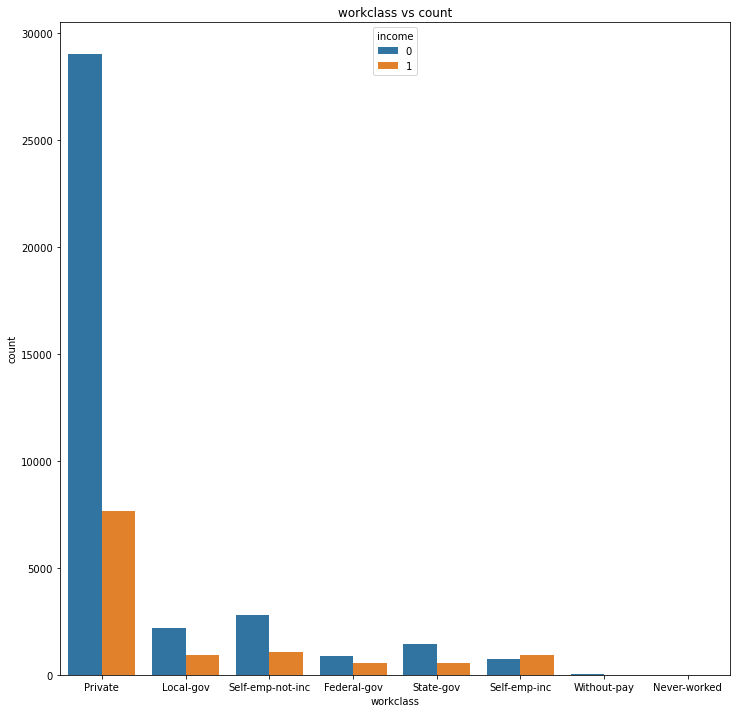

In [20]:
fig = plt.figure(figsize=(12,12)) 
ax = sns.countplot(x="workclass", hue="income", data=df).set_title("workclass vs count")

 - people earning less then 50k are more then those earning 50k

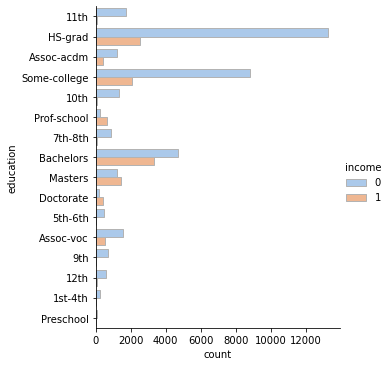

In [21]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".7",
            data=df);

 - most people have education level as HS(high school)

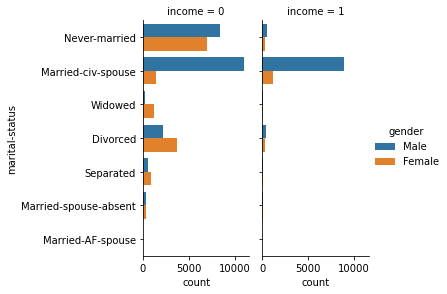

In [22]:
sns.catplot(y="marital-status", hue="gender", col="income",

                data=df, kind="count",

                height=4, aspect=.7);

 - The people with marital status as Married-civ-spouce has highest people with income more then 50k

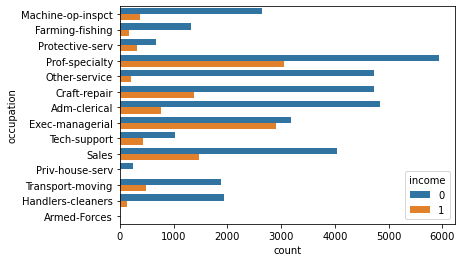

In [23]:
sns.countplot(y="occupation", hue="income",
            data=df);

 - Most of the people who have income more then 50k either have prof-speciality or exec-managerial as occupation

<Figure size 1440x504 with 0 Axes>

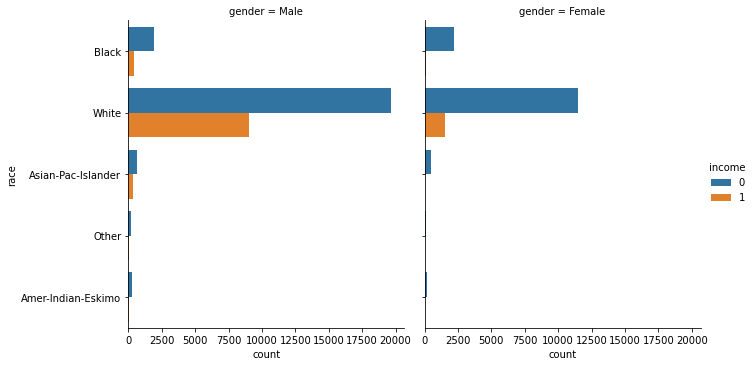

In [24]:
plt.figure(figsize=(20,7))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);

 - people with Gender male and race as white has the most people with income more then 50k

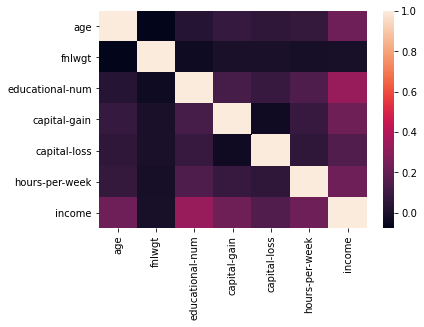

In [25]:
# plotting heatmap for checking correlation
sns.heatmap(df.corr())

### Data processing

In [26]:
# educational-num and fnlwgt are not important for our analysis so we can remove
df=df.drop(['educational-num','fnlwgt'],axis=1)

In [27]:
# removing outliers
# min. and max age shows there are ouliers similarly there are ouliers in hours -per-week
# using age interval from (20 - 60) and hours-per-week from (20-80)

df=df[(df["age"] < 60)]
df=df[(df["age"] > 20)]

df=df[(df["hours-per-week"] < 80)]
df=df[(df["hours-per-week"] > 20)]

In [28]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week,income
count,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000
mean,37.843648,1131.615516,91.856466,42.952354,0.267828
std,10.233663,7668.633568,410.721730,8.261506,0.442833
min,21.000000,0.000000,0.000000,21.000000,0.000000
25%,29.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,46.000000,0.000000,0.000000,45.000000,1.000000
max,59.000000,99999.000000,3900.000000,78.000000,1.000000


### Labelling the data

In [29]:
#label encoder
df = df.apply(le.fit_transform)

In [30]:
X=df.drop(["income"],axis=1)
y=df["income"]

In [31]:
# checking for data imbalance
df["income"].value_counts()

0    28275
1    10343
Name: income, dtype: int64

In [32]:
# using oversampling for handling imbalanced data

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

print(X_res.shape,y_res.shape)

(55332, 12) (55332,)


In [33]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4,3,1,4,6,3,2,1,0,0,19,38,0
1,17,3,11,2,4,0,4,1,0,0,29,38,0
2,7,1,7,2,10,0,4,1,0,0,19,38,1
3,23,3,15,2,6,0,2,1,62,0,19,38,1
5,13,3,0,4,7,1,4,1,0,0,9,38,0
6,8,3,11,4,9,4,2,1,0,0,19,38,0
8,3,3,15,4,7,4,4,0,0,0,19,38,0
11,15,0,9,2,0,0,4,1,0,0,19,38,0
12,5,3,11,4,0,1,4,0,0,0,18,38,0
13,37,3,11,2,9,0,4,1,0,0,14,38,0


### Split Train and Test data

In [44]:
#splitting the data into test and train for evaluation
# taking the test data as 30% and train data as 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  Implementing KNN

In [35]:
#implementing basic knn for k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
#applying knn on training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
#predicting on test data
pred = knn.predict(X_test)

### Prediction and validation

In [39]:
# checking the confusion matrix
print(confusion_matrix(y_test,pred))

[[7117 1396]
 [1158 1915]]


In [40]:
# evaluation parameters
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      8513
           1       0.58      0.62      0.60      3073

    accuracy                           0.78     11586
   macro avg       0.72      0.73      0.72     11586
weighted avg       0.79      0.78      0.78     11586



#### Choosing value of K

In [41]:
# finding the appropriate value of K using cross validation
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df['income'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy_rate')

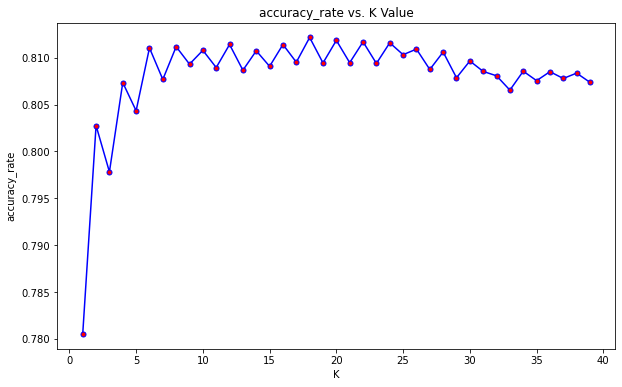

In [45]:
# accuracy vs K_value for identifying the appropriate value of K

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', marker='.',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

 - Highest value of accuracy is at k = 18 

In [43]:
# implementing KNN with value of K as 18

knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[7714  799]
 [1414 1659]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.87      8513
           1       0.67      0.54      0.60      3073

    accuracy                           0.81     11586
   macro avg       0.76      0.72      0.74     11586
weighted avg       0.80      0.81      0.80     11586



 - the model accuracy is 81%